# Detecting facial expressions from images


### Installation

In [1]:
!pip install -q py-feat

### Setting up the Detector

In [2]:
from feat import Detector

detector = Detector(
    face_model="retinaface",
    landmark_model="mobilefacenet",
    au_model='xgb',
    emotion_model="resmasknet",
    facepose_model="img2pose",
)

detector

C:\Users\HED_CL-01\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
100%|██████████| 176/176 [00:00<00:00, 176517.82it/s]
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\HED_CL-01/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:05<00:00, 8.21MB/s]


feat.detector.Detector(face_model=retinaface, landmark_model=mobilefacenet, au_model=xgb, emotion_model=resmasknet, facepose_model=img2pose)

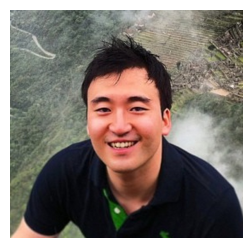

In [3]:
from feat.utils.io import get_test_data_path
from feat.plotting import imshow
import os

# Helper to point to the test data folder
test_data_dir = get_test_data_path()

# Get the full path
single_face_img_path = os.path.join(test_data_dir, "single_face.jpg")

# Plot it
imshow(single_face_img_path)

Now we use our initialized `detector` instance to make predictions with the `detect_image()` method.

In [4]:
single_face_prediction = detector.detect_image(single_face_img_path)

# Show results
single_face_prediction

100%|██████████| 1/1 [00:04<00:00,  4.33s/it]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,192.507716,140.455324,179.352746,259.257723,0.999708,186.667095,187.426731,189.18009,193.490044,202.441505,...,0.138215,0.000498,0.000025,0.001916,0.990629,0.000027,0.006876,0.00003,C:\Users\HED_CL-01\anaconda3\Lib\site-packages...,0


### Working with Fex data class results

#### Easily accessing FEX columns of interest. 

In [5]:
single_face_prediction.facebox

C:\Users\HED_CL-01\anaconda3\Lib\site-packages\feat\data.py:618: DeprecationWarning: Fex.facebox has been renamed to Fex.faceboxes
  warnings.warn(


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore
0,192.507716,140.455324,179.352746,259.257723,0.999708


In [6]:
single_face_prediction.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
0,0.624825,0.290032,0.067356,0.222518,0.930385,1.0,0.36814,0.745353,1.0,0.955968,0.72958,0.104619,0.15823,1.0,0.159763,0.012713,0.999769,0.835478,0.02806,0.138215


In [7]:
single_face_prediction.emotions

,anger,disgust,fear,happiness,sadness,surprise,neutral
0,0.000498,0.000025,0.001916,0.990629,0.000027,0.006876,0.00003


In [8]:
single_face_prediction.facepose # (in degrees)

C:\Users\HED_CL-01\anaconda3\Lib\site-packages\feat\data.py:507: DeprecationWarning: Fex.facepose has now been renamed to Fex.poses
  warnings.warn(


,Pitch,Roll,Yaw
0,0.811819,-3.737929,6.101123


#### Saving detection to a file

In [9]:
single_face_prediction.to_csv("output.csv", index=False)

#### Loading detection results from a saved file

In [10]:
# prefer to pandas read_csv
from feat.utils.io import read_feat

input_prediction = read_feat("output.csv")

# Show results
input_prediction

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,192.507716,140.455324,179.352746,259.257723,0.999708,186.667095,187.426731,189.18009,193.490044,202.441505,...,0.138215,0.000498,0.000025,0.001916,0.990629,0.000027,0.006876,0.00003,C:\Users\HED_CL-01\anaconda3\Lib\site-packages...,0


#### Visualizing detection results.

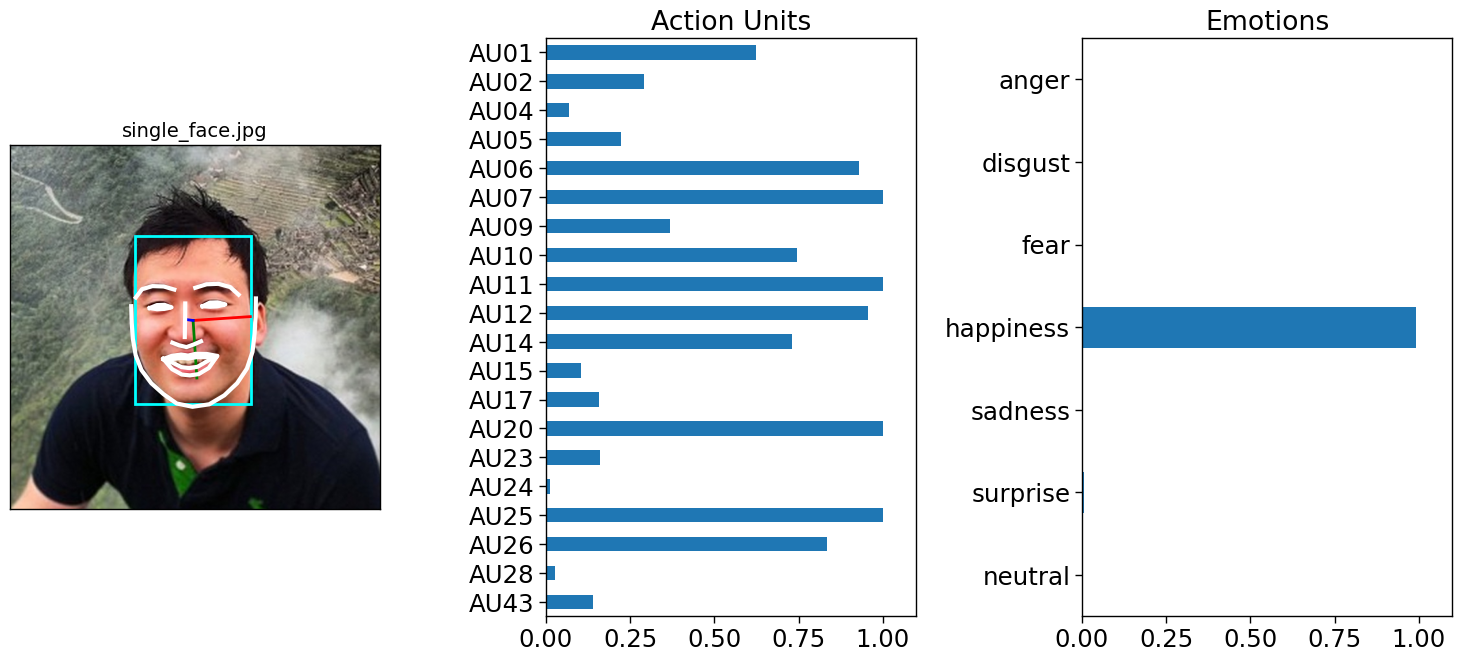

In [11]:
figs = single_face_prediction.plot_detections(poses=True)

100%|██████████| 20498112/20498112 [00:01<00:00, 11833799.85it/s]


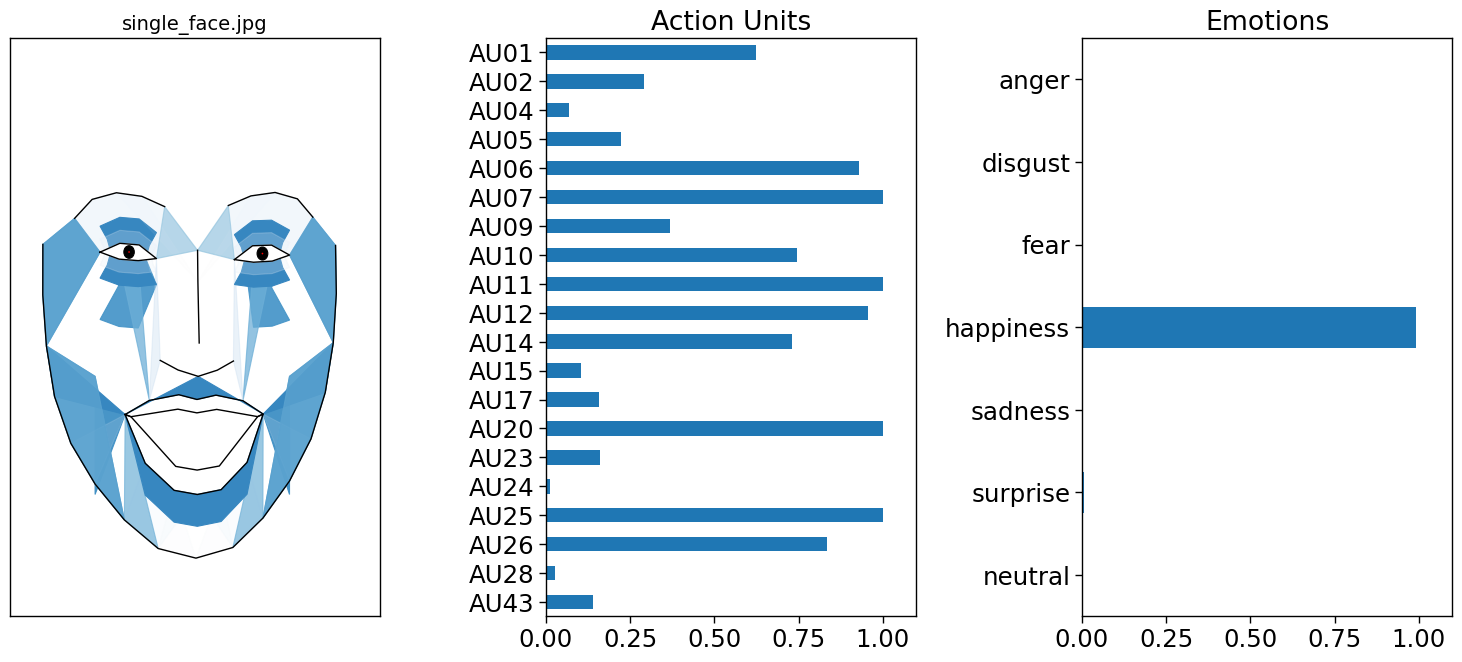

In [12]:
figs = single_face_prediction.plot_detections(faces='aus', muscles=True)

## Detecting multiple faces from a single image 

In [13]:
multi_face_image_path = os.path.join(test_data_dir, "multi_face.jpg")
multi_face_prediction = detector.detect_image(multi_face_image_path)

# Show results
multi_face_prediction

100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,683.340962,288.568915,105.420755,134.124911,0.999817,685.483099,683.345557,682.124418,682.747507,686.454509,...,0.378646,0.000319,0.003674,0.000121,0.992675,0.000280,0.002700,0.000231,C:\Users\HED_CL-01\anaconda3\Lib\site-packages...,0
1,531.699620,309.095124,97.330348,123.796507,0.999361,533.869643,532.053229,531.433829,532.123172,534.835996,...,0.751587,0.000161,0.000072,0.000070,0.999318,0.000084,0.000276,0.000017,C:\Users\HED_CL-01\anaconda3\Lib\site-packages...,0
2,316.664986,236.808266,91.607044,120.287714,0.998966,313.316128,314.463390,316.817667,320.903578,327.532338,...,0.100871,0.000062,0.000048,0.000080,0.991051,0.000030,0.008696,0.000033,C:\Users\HED_CL-01\anaconda3\Lib\site-packages...,0
3,435.052600,211.107536,81.976803,101.041442,0.994319,436.109466,436.977502,438.472255,440.473766,443.726039,...,0.150066,0.014431,0.009055,0.000090,0.036599,0.005885,0.003246,0.930694,C:\Users\HED_CL-01\anaconda3\Lib\site-packages...,0
4,220.073854,64.653720,85.268424,110.928962,0.994262,219.333061,217.626406,216.715176,216.977729,219.749611,...,0.139765,0.000048,0.004724,0.000144,0.992502,0.000013,0.002545,0.000024,C:\Users\HED_CL-01\anaconda3\Lib\site-packages...,0


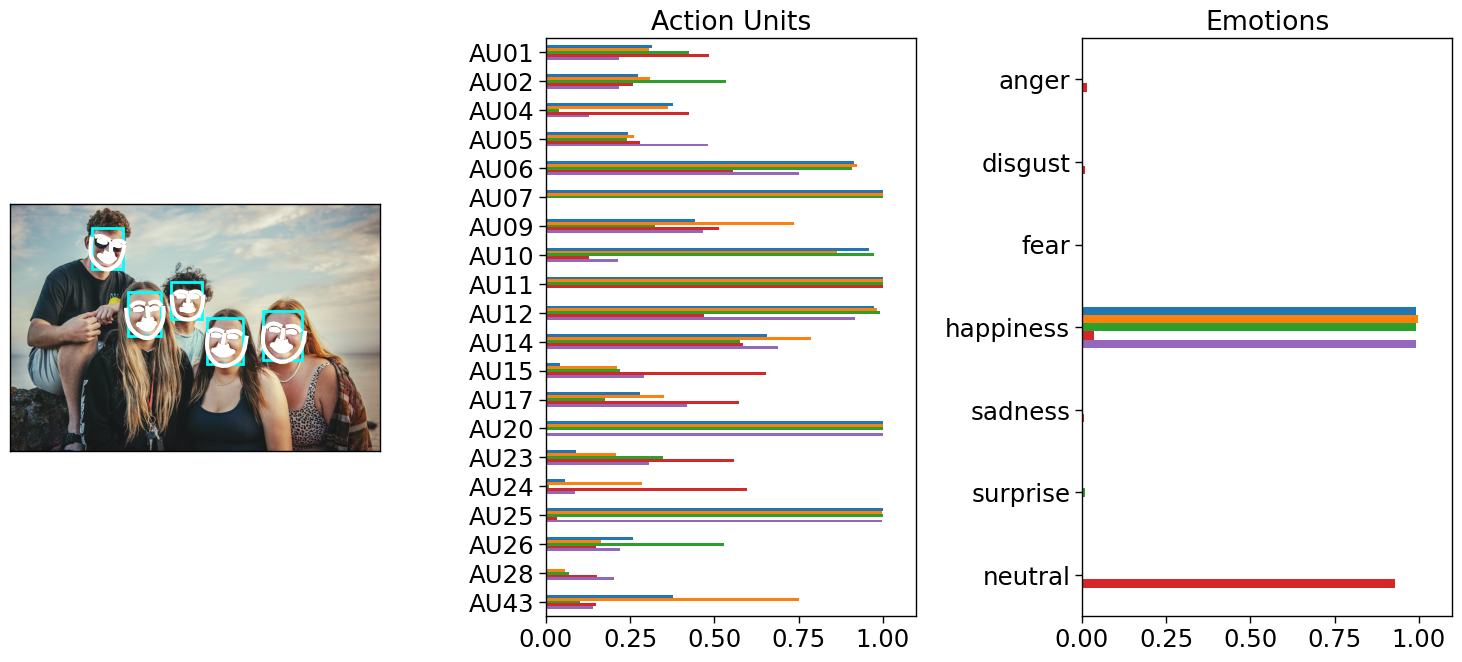

In [14]:
figs = multi_face_prediction.plot_detections(add_titles=False)

## Detecting faces from multiple images

**NOTE: Currently batch processing images gives slightly different AU detection results due to the way that py-feat integrates the underlying models. You can examine the degree of tolerance by checking out the results of `test_detection_and_batching_with_diff_img_sizes` in our test-suite**

In [15]:
img_list = [single_face_img_path, multi_face_image_path]

mixed_prediction = detector.detect_image(img_list, batch_size=1)
mixed_prediction

100%|██████████| 2/2 [00:03<00:00,  1.97s/it]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,192.507716,140.455324,179.352746,259.257723,0.999708,186.667095,187.426731,189.180090,193.490044,202.441505,...,0.138215,0.000498,0.000025,0.001916,0.990629,0.000027,0.006876,0.000030,C:\Users\HED_CL-01\anaconda3\Lib\site-packages...,0
1,683.340962,288.568915,105.420755,134.124911,0.999817,685.483099,683.345557,682.124418,682.747507,686.454509,...,0.378646,0.000319,0.003674,0.000121,0.992675,0.000280,0.002700,0.000231,C:\Users\HED_CL-01\anaconda3\Lib\site-packages...,1
2,531.699620,309.095124,97.330348,123.796507,0.999361,533.869643,532.053229,531.433829,532.123172,534.835996,...,0.751587,0.000161,0.000072,0.000070,0.999318,0.000084,0.000276,0.000017,C:\Users\HED_CL-01\anaconda3\Lib\site-packages...,1
3,316.664986,236.808266,91.607044,120.287714,0.998966,313.316128,314.463390,316.817667,320.903578,327.532338,...,0.100871,0.000062,0.000048,0.000080,0.991051,0.000030,0.008696,0.000033,C:\Users\HED_CL-01\anaconda3\Lib\site-packages...,1
4,435.052600,211.107536,81.976803,101.041442,0.994319,436.109466,436.977502,438.472255,440.473766,443.726039,...,0.150066,0.014431,0.009055,0.000090,0.036599,0.005885,0.003246,0.930694,C:\Users\HED_CL-01\anaconda3\Lib\site-packages...,1
5,220.073854,64.653720,85.268424,110.928962,0.994262,219.333061,217.626406,216.715176,216.977729,219.749611,...,0.139765,0.000048,0.004724,0.000144,0.992502,0.000013,0.002545,0.000024,C:\Users\HED_CL-01\anaconda3\Lib\site-packages...,1


**Calling `.plot_detections()` will now plot detections for all images the detector was passed:**

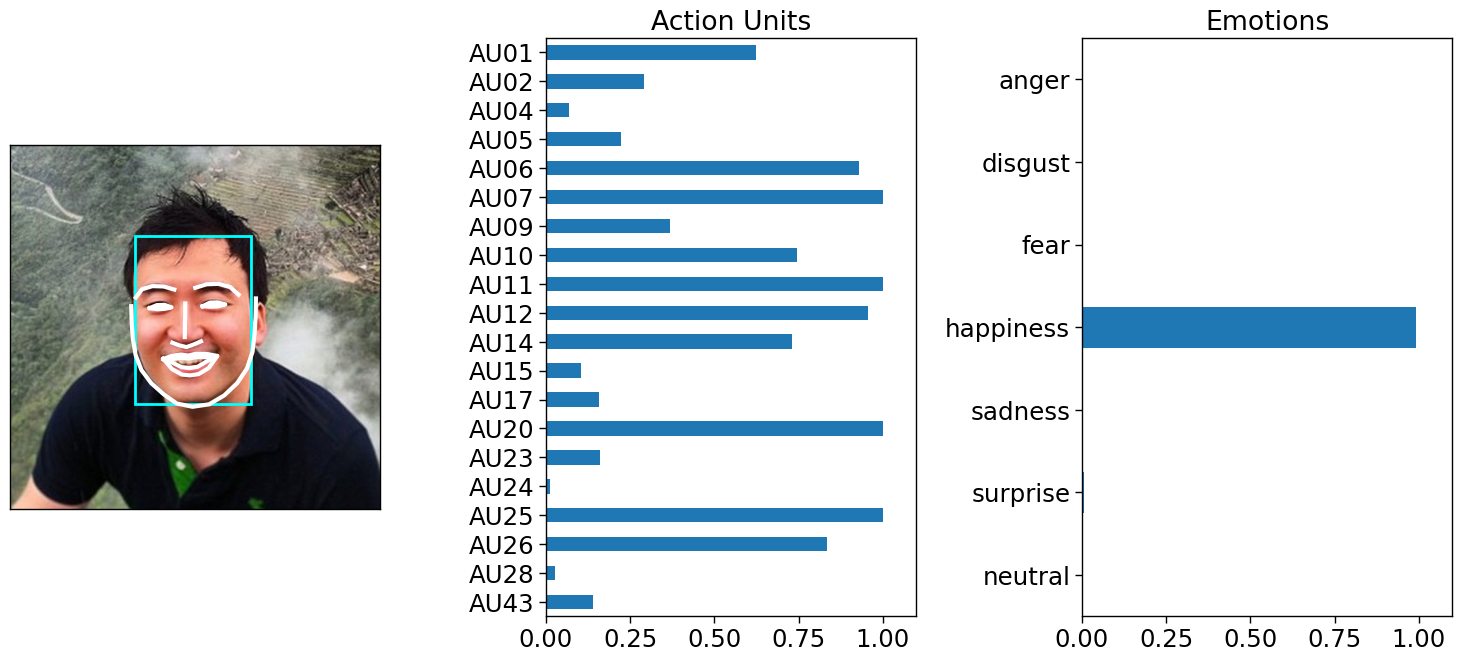

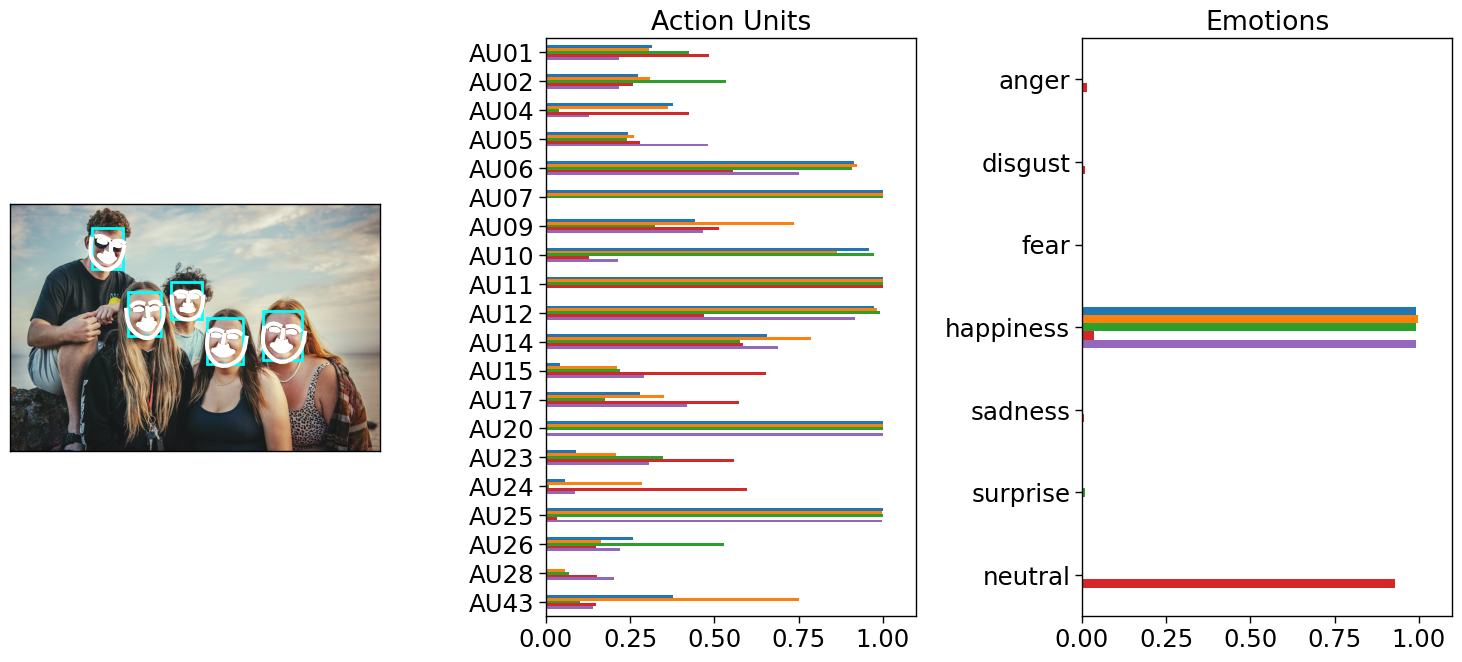

In [16]:
figs = mixed_prediction.plot_detections(add_titles=False)

**However, it's easy to use pandas slicing sytax to just grab predictions for the image you want. For example you can use `.loc` and chain it to `.plot_detections()`:**

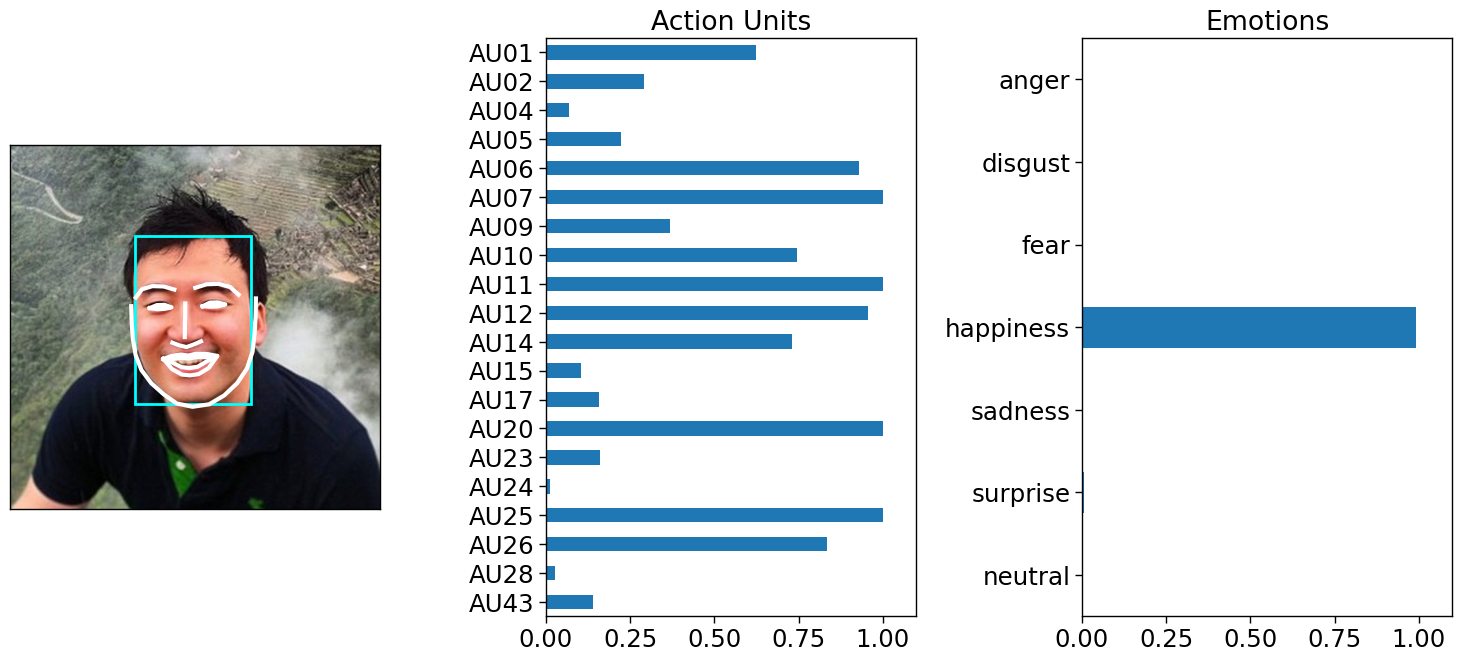

In [17]:
# Just plot the detection corresponding to the first row in the Fex data
figs = mixed_prediction.loc[0].plot_detections(add_titles=False)

**Likewise you can use `.query()` and chain it to `.plot_detections()`. `Fex` data classes store each file path in the `'input'` column. So we can use regular pandas methods like `.unique()` to get all the unique images (2 in our case) and pick the second one.**

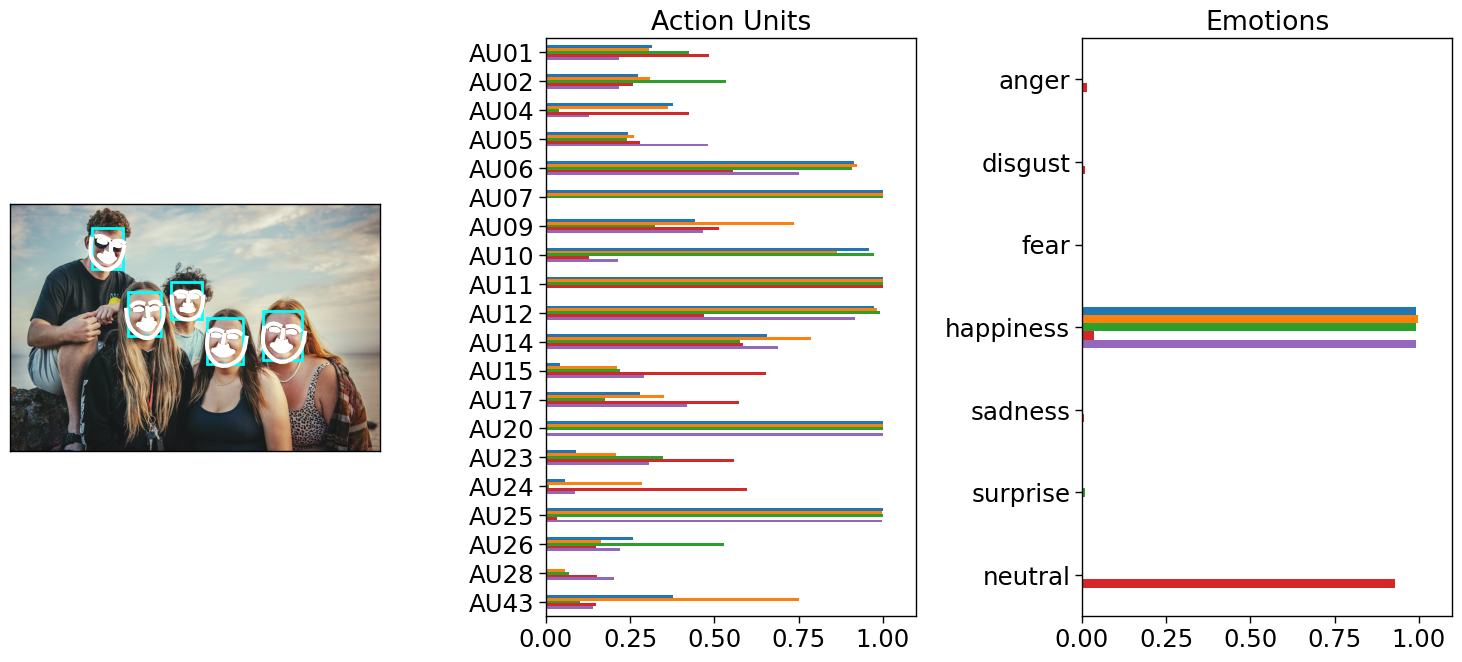

In [18]:
# Choose plot based on image file name
img_name = mixed_prediction['input'].unique()[1]
axes = mixed_prediction.query("input == @img_name").plot_detections(add_titles=False)